#Construção dos testes de hipóteses:
* *Passo 1:* Escolher o teste estatístico adequado, dado o intuito do pesquisador
* *Passo 2:* Apresentar a hipótese nula ${H_0}$ e a hipótese alternativa ${H_1}$ do teste.
* *Passo 3:* Fixar o nível de significância (probabilidade de erro do tipo 1) **α**.
* *Passo 4:* Calcular o valor observado da estatística do teste com base na amostra extraída da população.
* *Passo 5:* Determinar a região crítica do teste em função do valor de **α** fixado no passo 3.

Devemos definir a hipótese a ser testada sobre o parâmetro θ dessa população, que é chamada de hipótese nula:

$$H_0 : \theta = \theta_0 $$

Definiremos também a hipótese alternativa $(H_1)$, caso $H_0$ seja rejeitada, que pode ser caracterizada da seguinte forma:
$$H_1 : \theta \neq \theta_0 $$


#O Teste de Komogorov Smirnov

O Teste de K-S mede a diferença entre: *A Distribuição Real de uma amostra e a Distribuição Esperada*.

Assim, verificamos se a distribuição referente a amostra estudada é Normal.

* A nossa amostra apresentará a numeração de calçados de uma população.

As hipóteses do teste de Kolmogorov-Smirnov (K-S) para o nosso exemplo serão:

$H_0$: A numeração de calçados de uma população segue uma distribuição normal $N(μ, σ).$

$H_1$: A numeração de calçados de uma população não segue uma distribuição normal $N(μ, σ).$


In [97]:
# @title Importação de bibliotecas
import pandas as pd
import numpy as np
import random
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
# @title Amostragem aleatória

import random
random.seed(123)

limite_inferior = 32
limite_superior = 42
tamanho_amostra = 500

#probabilidades da faixa de valores
probabilidades = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]

#normalizar as probabilidades para somar 1
probabilidades_normalizadas = [p / sum(probabilidades) for p in probabilidades]

#gera a amostra aleatória com base nas probabilidades
amostra_aleatoria = []
for _ in range(tamanho_amostra):
    valor = random.choices(range(limite_inferior, limite_superior + 1), weights=probabilidades_normalizadas)[0] #esse [0] é pra tirar o valor único da lista
    amostra_aleatoria.append(valor)

print(amostra_aleatoria)


[33, 34, 36, 34, 40, 33, 37, 36, 40, 34, 36, 36, 35, 32, 37, 34, 38, 33, 36, 37, 40, 34, 34, 39, 32, 40, 37, 35, 40, 39, 36, 39, 35, 38, 37, 39, 36, 36, 39, 37, 38, 38, 38, 40, 37, 38, 36, 33, 39, 35, 39, 40, 38, 35, 36, 36, 33, 37, 37, 36, 35, 34, 38, 32, 36, 35, 37, 39, 40, 38, 42, 41, 38, 35, 37, 35, 42, 37, 39, 33, 34, 35, 35, 36, 35, 37, 37, 34, 33, 36, 34, 37, 32, 37, 33, 38, 36, 42, 35, 37, 39, 36, 36, 38, 41, 40, 37, 38, 38, 36, 35, 33, 40, 33, 37, 37, 34, 38, 40, 39, 36, 34, 42, 37, 38, 39, 36, 33, 34, 38, 36, 40, 39, 42, 38, 36, 39, 33, 37, 40, 37, 34, 37, 37, 36, 40, 36, 35, 37, 35, 36, 36, 41, 33, 35, 35, 42, 40, 35, 37, 34, 36, 36, 37, 41, 39, 37, 39, 37, 39, 39, 35, 39, 37, 37, 36, 35, 37, 34, 38, 40, 39, 38, 37, 38, 34, 33, 40, 36, 38, 37, 36, 39, 36, 39, 39, 35, 42, 33, 36, 37, 39, 35, 37, 36, 41, 34, 35, 39, 36, 41, 33, 36, 34, 37, 41, 36, 38, 35, 37, 37, 35, 38, 37, 40, 35, 41, 35, 32, 38, 39, 37, 33, 42, 34, 40, 40, 35, 40, 37, 40, 40, 39, 36, 37, 42, 36, 36, 38, 33,

In [99]:
amostra_serie = pd.Series(amostra_aleatoria)
amostra_serie.value_counts()

37    82
36    71
39    60
35    54
38    54
34    48
40    45
33    37
41    20
32    15
42    14
dtype: int64

In [102]:
df = amostra_serie.value_counts().reset_index()
df.columns = ['X_i','F_abs'] #Valor e Freq abs

In [103]:
#organizando o df em ordem crescente dos valores/variáveis
df = df.sort_values(by='X_i')

In [104]:
df=df.reset_index()
df=df.drop(columns=['index'])

In [106]:
# @title Adicionando Colunas de Frequências
df['F_ac'] = df['F_abs'].cumsum() #Frequência acumulada
df['F_r'] = df['F_abs']/(tamanho_amostra) #Frequência relativa
df['F_obs'] = df['F_r'].cumsum() #Frequência acumulada observada

In [107]:
df

,X_i,F_abs,F_ac,F_r,F_obs
0,32,15,15,0.030,0.030
1,33,37,52,0.074,0.104
2,34,48,100,0.096,0.200
3,35,54,154,0.108,0.308
4,36,71,225,0.142,0.450
5,37,82,307,0.164,0.614
6,38,54,361,0.108,0.722
7,39,60,421,0.120,0.842
8,40,45,466,0.090,0.932
9,41,20,486,0.040,0.972


In [108]:
# @title Calculando estatísticas

media = np.mean(amostra_aleatoria)
desvio = np.std(amostra_aleatoria)
erro_padrao = desvio/np.sqrt(len(amostra_aleatoria))
max = np.max(amostra_aleatoria)
min = np.min(amostra_aleatoria)
soma = sum(amostra_aleatoria)
count = len(amostra_aleatoria)
variancia = np.var(amostra_aleatoria)

info_dados = [media,erro_padrao,desvio,variancia,min,max,soma,count]
strings = ['Média','Erro padrão','Desvio padrão','Variância',
           'Mínimo','Máximo','Soma','Contagem']
for i in range(len(info_dados)):
  print(f'{strings[i]} = {info_dados[i]}')



Média = 36.826
Erro padrão = 0.11026988709525372
Desvio padrão = 2.4657096341621414
Variância = 6.0797240000000015
Mínimo = 32
Máximo = 42
Soma = 18413
Contagem = 500


In [117]:
# @title Novas Colunas

#FrequenciaEsperada
from scipy.stats import norm

df['Z-score'] = (df['X_i'] - media) / desvio
df['F_esp'] = norm.cdf(df['Z-score'])
df['|F_esp(X_i)-F_obs(X_i)|'] = abs(df['F_esp']-df['F_obs'])
df['|F_esp(X_i)-F_obs(X_{i-1})|'] = abs(df['F_esp'] - df['F_obs'].shift(fill_value=0))

In [118]:
df

,X_i,F_abs,F_ac,F_r,F_obs,Z-score,F_esp,|F_esp(Xi)-F_obs(Xi)|,|F_esp(Xi)-F_obs(X{i-1})|,|F_esp(X_i)-F_obs(X_i)|,|F_esp(X_i)-F_obs(X_{i-1})|
0,32,15,15,0.030,0.030,-1.957246,0.025159,0.004841,0.025159,0.004841,0.025159
1,33,37,52,0.074,0.104,-1.551683,0.060369,0.043631,0.030369,0.043631,0.030369
2,34,48,100,0.096,0.200,-1.146120,0.125873,0.074127,0.021873,0.074127,0.021873
3,35,54,154,0.108,0.308,-0.740558,0.229481,0.078519,0.029481,0.078519,0.029481
4,36,71,225,0.142,0.450,-0.334995,0.368814,0.081186,0.060814,0.081186,0.060814
5,37,82,307,0.164,0.614,0.070568,0.528129,0.085871,0.078129,0.085871,0.078129
6,38,54,361,0.108,0.722,0.476131,0.683009,0.038991,0.069009,0.038991,0.069009
7,39,60,421,0.120,0.842,0.881693,0.811029,0.030971,0.089029,0.030971,0.089029
8,40,45,466,0.090,0.932,1.287256,0.900997,0.031003,0.058997,0.031003,0.058997
9,41,20,486,0.040,0.972,1.692819,0.954755,0.017245,0.022755,0.017245,0.022755


<Axes: ylabel='Count'>

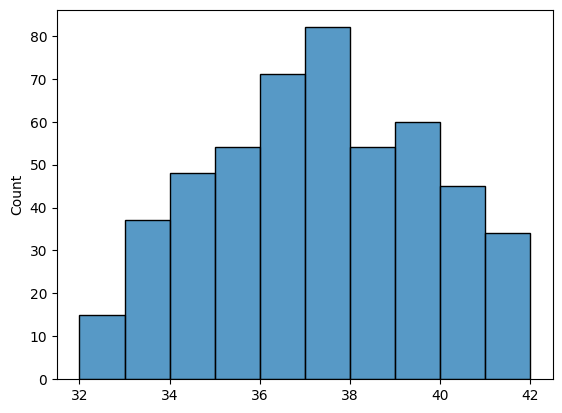

In [111]:
# @title Histograma da nossa amostra
sns.histplot(amostra_aleatoria)

In [119]:
# @title Dcalc
max_Fesp_Fobs = (df['|F_esp(X_i)-F_obs(X_i)|']).max()
max_Fesp_Fobs1 =(df['|F_esp(X_i)-F_obs(X_{i-1})|']).max()
listaMax = [max_Fesp_Fobs,max_Fesp_Fobs1]
Dcalc = np.max(listaMax)
print("Dcalc:", Dcalc) #Dcalc = estatística de teste calculada

Dcalc: 0.08902869425136217


In [116]:
# @title Dc
#Como o nível de insignificância = 0,05

Dc = 1.36 / np.sqrt(tamanho_amostra)
print("Dc:", Dc) #valor crítico

Dc: 0.06082104898799428


Como:

$D_{calc} > D_{c}$

$0.089 > 0.0608$

Hipótese ${H_0}$ **rejeitada.**

Nossa distribuição **NÃO** é uma distribuição **Normal.**

## Aplicação pelo Scipy para Comparação de Resultados

In [115]:
from scipy import stats

#realizar o teste de Kolmogorov-Smirnov
resultado_teste = stats.kstest(amostra_aleatoria,'norm',args=(media, desvio))
print(resultado_teste)
#imprimir o resultado
'''print("Estatística de teste:", resultado_teste.statistic)
print("Valor p:", resultado_teste.pvalue)
'''
#interpretar o resultado
alpha = 0.05
if resultado_teste.pvalue < alpha:
    print("Hipótese nula rejeitada: a amostra NÃO segue uma distribuição Normal")
else:
    print("Hipótese nula aceita: a amostra segue uma distribuição Normal")


KstestResult(statistic=0.08902869425136217, pvalue=0.000673561907564862, statistic_location=39, statistic_sign=-1)
Hipótese nula rejeitada: a amostra NÃO segue uma distribuição Normal
